# Can You Stack The Deck With Suits? (2) Classic (2023.03.17)

link: https://fivethirtyeight.com/features/can-you-stack-the-deck-with-suits/

## I. Puzzle

Brett plays poker with a large group of friends. With so many friends playing at the same time, Brett needs more than the 52 cards in a standard deck. This got Brett and his friends wondering about a deck with more than four suits.

Suppose you have a deck with more than four suits, but still 13 cards per suit. And further suppose that you’re playing a game of five-card stud — that is, each participant is dealt five cards that they can’t trade.

As the number of suits increases, the probability of each hand changes. With four suits, a straight is more likely than a full house (a three-of-a-kind and a different two-of-a-kind in the same hand). How many suits would the deck need so that a straight (not including a straight flush) is less likely than a full house?

# II. Solution

The probability for a **straight** without a straight flush in $n$-card poker is

$$P(\text{straight}) = 10 \cdot \binom{n}{1}^5-10 \cdot \binom{n}{1}$$
$$= 10 \cdot\left(\frac{n\cdot(n-1)\cdots 2 \cdot 1}{(n-1)\cdot(n-2)\cdots 2 \cdot 1} \right)^5-10 \cdot\frac{n\cdot(n-1)\cdots 2 \cdot 1}{(n-1)\cdot(n-2)\cdots 2 \cdot 1}= 10 \cdot(n^5-n)$$



The probability for a **full house** is:
$$P(\text{full house}) = \binom{13}{1} \cdot\binom{n}{2} \cdot\binom{12}{1}\cdot \binom{n}{3}$$
$$= 13 \cdot \frac{n(n-1)(n-2)\dots }{2((n-2)(n-3)\dots)} \cdot12 \cdot\frac{n(n-1)\dots}{6(n-3)(n-4)\dots }= 13n^2(n-1)^2(n-2)$$

We have to find $n$ for the inequality:

$$13n^2(n-1)^2(n-2) > 10 \cdot(n^5-n)$$

With the help of sympy we find the solution:

In [55]:
import sympy as sp

x = sp.symbols('x')
solution = sp.solve_univariate_inequality(13*x**2*(x-1)**2*(x-2)>10*(x**5-x), x,domain = sp.Interval(4, 50))
round(solution.args[1].args[0].evalf(), 4)

16.0133

**Solution:** We need at least 17 suits so that a full house is likelier that a straight.

## Matplot

In [33]:
from math import comb
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def calc_prob(n_suits):
	full_house = comb(n_suits,2)*comb(13,1) * comb(n_suits,3) * comb(12,1) / comb(n_suits*13,5)
	straight = (comb(n_suits,1)**5 * 10 - comb(n_suits,1)*comb(10,1)) / comb(n_suits*13,5)

	return (full_house, straight)

In [51]:
max_suits = 20
prob = np.zeros((max_suits,2)) 

for s in range(4,max_suits):
	prob[s,0], prob[s,1] = calc_prob(s)

suits = np.arange(4,max_suits,1)

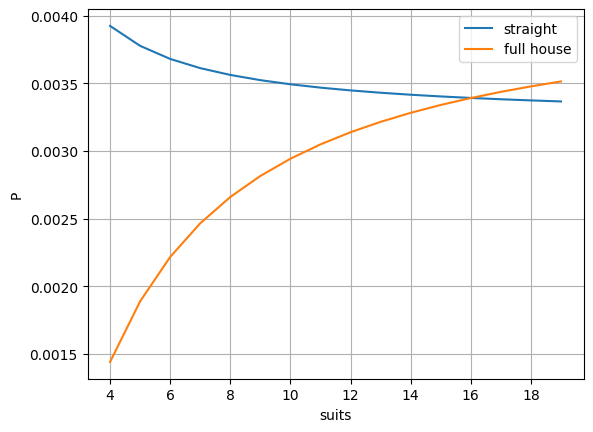

In [52]:
plt.plot(suits, prob[4:,1], label='straight')
plt.plot(suits, prob[4:,0], label='full house')
plt.xlabel('suits')
plt.ylabel('P')
plt.grid(True)
plt.legend()
plt.show()

In [71]:
for s in [16, 17]: 
	print(f'With {s} suits: ')
	print(f'- full house : {prob[s,0]*100:.4f} %.') 
	print(f'- straight : {prob[s,1]*100:.4f} %.\n') 


With 16 suits: 
- full house : 0.3391 %.
- straight : 0.3392 %.

With 17 suits: 
- full house : 0.3437 %.
- straight : 0.3383 %.

